# Weighted Grammar

This notebook uses the weights generated in the notebook `GrammarGenerator` to generate sample levels. It isn't meant to generate great levels, just a testbed to see how things can progress.

In [1]:
PATH_GRAMMAR_1 = 'grammar/1_grammar.json'
PATH_GRAMMAR_2 = 'grammar/2_grammar.json'
PATH_GRAMMAR_3 = 'grammar/3_grammar.json'
PATH_GRAMMAR_4 = 'grammar/4_grammar.json'
PATH_GRAMMAR_5 = 'grammar/5_grammar.json'

grammar_paths = [PATH_GRAMMAR_1, PATH_GRAMMAR_2, PATH_GRAMMAR_3, PATH_GRAMMAR_4, PATH_GRAMMAR_5]

In [2]:
from map_generation import generate_image
from IPython.display import Image
from datetime import datetime
import random
import json
import os

In [3]:
random.seed(datetime.now())

The way I know how to visualize a result for a generated map, using a previous image is to generate it into a temp png and then use the IPython display Image to show the image. After that, you can delete the image and it will still show up on the notebook:

```
generate_image.convert_map(map_str, display=False, save_path='temp_map.png')  
Image(filename='temp_map.png') 
os.remove("temp_map.png")    
```

Note, however, immediately deleting after calling the Image function will not work. Not sure why, but if you call the image function in a separate cell than it's fine.

In [4]:
f = open('grammar/grammar.json', 'r')
grammar_to_col = json.loads(f.read())
f.close()

In [5]:
MIN_MAP_LENGTH = 200
FLAG_GRAMMAR = '35' # 36 is the flat but 35 is where we the next step has tobe 36
END_GRAMMAR = '36'
START_GRAMMAR = '0'

In [6]:
for i in range(len(grammar_paths)):
    grammar_size = i+1
    f = open('grammar/%i_grammar.json' % (grammar_size), 'r')
    grammar = json.loads(f.read())
    f.close()
    
    grammar_map = [START_GRAMMAR for i in range(6)]

    current_iteration = 0
    generate = True
    while generate:
        grammar_input = ','.join(grammar_map[-grammar_size:])
        grammar_values = grammar[grammar_input]
        weight_val = random.uniform(0, 1)
        current_weight = 0.0
        
        for key in grammar_values:
            current_weight += grammar_values[key]
            
            if current_weight > weight_val:
                if current_iteration < MIN_MAP_LENGTH and key == FLAG_GRAMMAR:
                    continue
                    
                grammar_map.append(key)
                if key == END_GRAMMAR:
                    generate = False
                    
                break
                
        current_iteration += 1
    
    map_text = ''
    for g in grammar_map:
        map_text += grammar_to_col[g] + '\n'
    
    generate_image.convert_map(map_text, display=False, save_path='temp_map%i.png' % (i))

### 1 Length Grammar

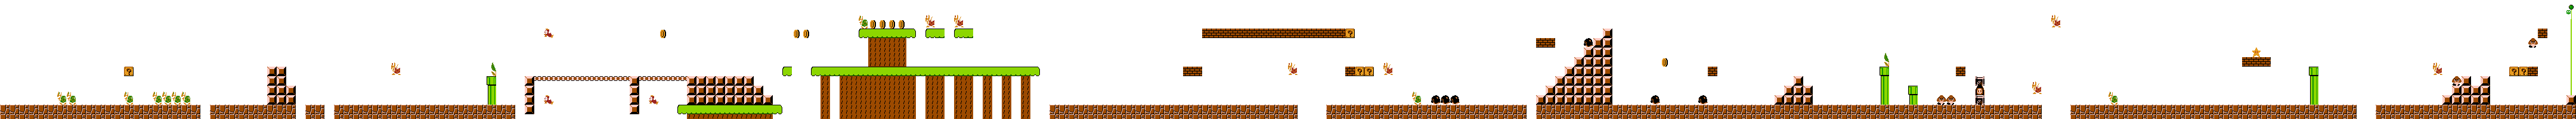

In [7]:
Image(filename='temp_map0.png')

### 2 length Grammar

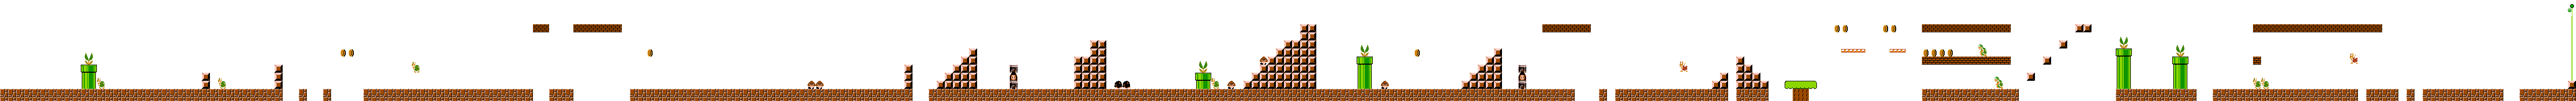

In [8]:
Image(filename='temp_map1.png')

### 3 Length Grammar

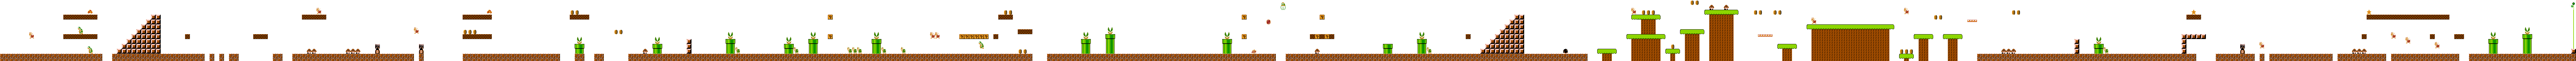

In [9]:
Image(filename='temp_map2.png')

### 4 Length Grammar

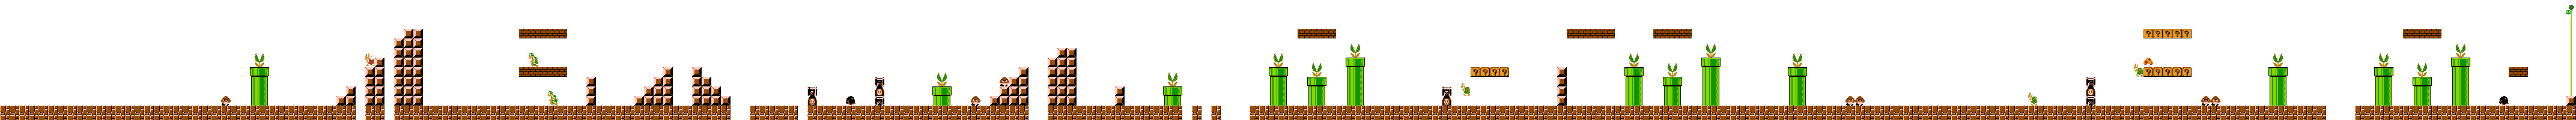

In [10]:
Image(filename='temp_map3.png')

### 5 Length Grammar

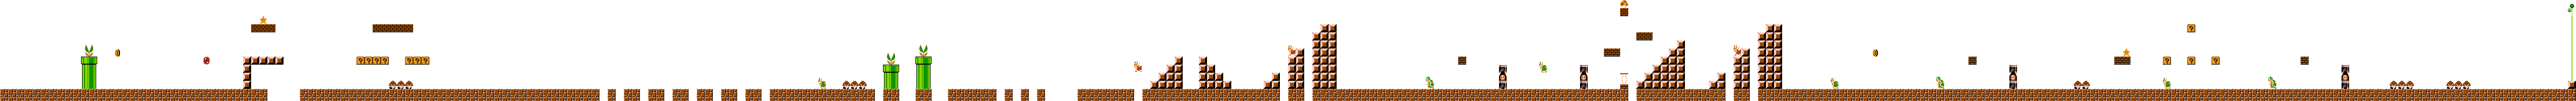

In [11]:
Image(filename='temp_map4.png')

After generation of images, delete them.

In [12]:
os.remove('temp_map0.png')
os.remove('temp_map1.png')
os.remove('temp_map2.png')
os.remove('temp_map3.png')
os.remove('temp_map4.png')